In [1]:
from PIL import Image, ImageDraw, ImageFilter
import json
from tqdm import tqdm
import os

In [2]:
dataset_path = 'Website Screenshots.v1-raw.coco/train/'

with open(dataset_path + '_annotations.coco.json') as file:
    annot = json.load(file)

img_annots = annot['images']

In [3]:
img_files = []
for f in img_annots:
    img_files.append(f['file_name'])

print('image 개수: ', len(img_files))

image 개수:  1688


## Crop images

In [4]:
os.mkdir('train/sharp') # 블러 처리된 이미지 저장할 폴더 만들기

In [5]:
dataset_path = 'Website Screenshots.v1-raw.coco/train/'
save_path = 'train/sharp/'

for i, image in tqdm(enumerate(img_annots)):
    
    img_id = image['id']

    os.mkdir(save_path + 'image_'+str(img_id))    



0it [00:00, ?it/s]

1688it [00:00, 2659.42it/s]


In [6]:
save_path = 'train/sharp/' # 원본 이미지 저장할 폴더 만들기
img_id = -1

for i, ann in tqdm(enumerate(annot["annotations"])):
    
    img = Image.open(dataset_path + img_files[ann['image_id']])
    folder_path = save_path + 'image_'+str(ann['image_id']) + '/'

    if ann['category_id'] == 8:

        if img_id == ann['image_id']:
            ann_id += 1
        else:
            ann_id = 1
            img_id = ann['image_id']
            img_name = 'image_' + str(img_id)
        
        box = ann['bbox']
        x1 = box[0]
        y1 = box[1]
        x2 = x1 + box[2]
        y2 = y1 + box[3]

        try:
            c_img = img.crop((x1, y1, x2, y2))
            c_img.save(folder_path + img_name + '_' + str(ann_id) + '.png')
        except:
            continue
    
        

76820it [03:23, 378.40it/s] 


## Process images

In [7]:
# os.mkdir('train/blur') # 블러 처리된 이미지 저장할 폴더 만들기

In [8]:
save_path = 'train/blur/' 

for i, image in tqdm(enumerate(img_annots)):
    
    img_id = image['id']

    os.mkdir(save_path + 'image_'+str(img_id))    

1688it [00:00, 8230.88it/s]


In [11]:
dataset_path = 'train/sharp/' 
save_path = 'train/blur/' 

for i, img_folder in enumerate(os.listdir(dataset_path)):
    
    folder_path = save_path + img_folder + '/'
    
    for j, c_img in enumerate(os.listdir(dataset_path + img_folder)):
        
        img = Image.open(dataset_path + img_folder + '/' + c_img)
        b_img = img.filter(ImageFilter.BLUR)
        b_img.save(folder_path + c_img[:-4] + '_prc.png')

    

In [ ]:
dataset_path = 'train/sharp/' 
save_path = 'train/blur/' # 원본 이미지 저장할 폴더 만들기
img_id = -1

for i, img_folder in enumerate(os.listdir(dataset_path)):
    
    folder_path = save_path + img_folder + '/'

    for j, c_img in enumerate(os.listdir(dataset_path + img_folder)):
        
        img = Image.open(dataset_path + img_folder + '/' + c_img)
        
        try:
            b_img = img.filter(ImageFilter.BLUR)
            print(folder_path + c_img[:-4] + '_prc.png')
            # b_img.save(folder_path + c_img + '_prc.png')
        except:
            continue
    
        

### 이미지 예시

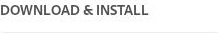

In [18]:
sharp = Image.open('train/sharp/image_10/image_10_1.png')
sharp

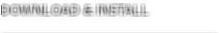

In [19]:
blur = Image.open('train/blur/image_10/image_10_1_prc.png')
blur